In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder  
from matplotlib import pyplot as plt

In [26]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [28]:
df.isnull().sum()

ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [29]:
object_columns = df.select_dtypes(include=["object"]).columns

# Identify object columns with missing values
columns_with_nan = [col for col in object_columns if df[col].isnull().sum() > 0]

# Fill NaN values with mode only in those columns
df.fillna({col: df[col].mode()[0] for col in columns_with_nan}, inplace=True)

In [30]:
df.isnull().sum()

ID                             0
Country                        0
Population_Size                0
Age                            0
Gender                         0
Smoker                         0
Years_of_Smoking               0
Cigarettes_per_Day             0
Passive_Smoker                 0
Family_History                 0
Lung_Cancer_Diagnosis          0
Cancer_Stage                   0
Survival_Years                 0
Adenocarcinoma_Type            0
Air_Pollution_Exposure         0
Occupational_Exposure          0
Indoor_Pollution               0
Healthcare_Access              0
Early_Detection                0
Treatment_Type                 0
Developed_or_Developing        0
Annual_Lung_Cancer_Deaths      0
Lung_Cancer_Prevalence_Rate    0
Mortality_Rate                 0
dtype: int64

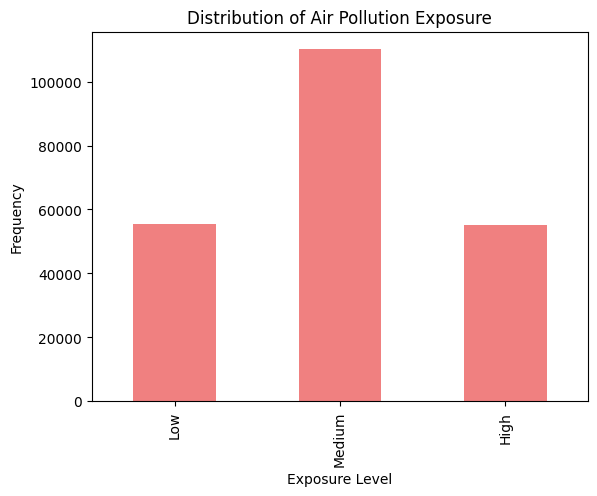

In [31]:
order = ['Low', 'Medium', 'High']

df['Air_Pollution_Exposure'] = pd.Categorical(df['Air_Pollution_Exposure'], categories=order, ordered=True)

df['Air_Pollution_Exposure'].value_counts().sort_index().plot(kind='bar', color='lightcoral')

plt.title('Distribution of Air Pollution Exposure')
plt.xlabel('Exposure Level')
plt.ylabel('Frequency')
plt.show()

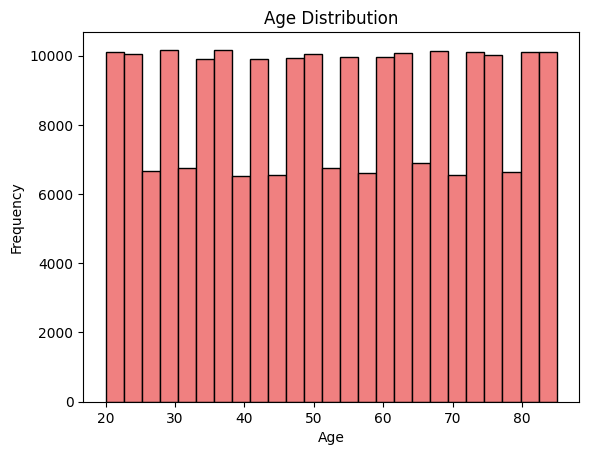

In [32]:
plt.hist(df['Age'], bins=25, color='lightcoral', edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

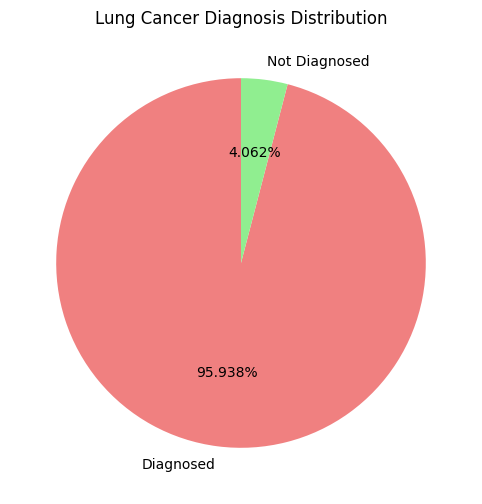

In [33]:
diagnosis_counts = df['Lung_Cancer_Diagnosis'].value_counts()

labels = ["Diagnosed", "Not Diagnosed"]

plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=labels, autopct='%1.3f%%', startangle=90, colors=['lightcoral', 'lightgreen'])

plt.title("Lung Cancer Diagnosis Distribution")
plt.show()


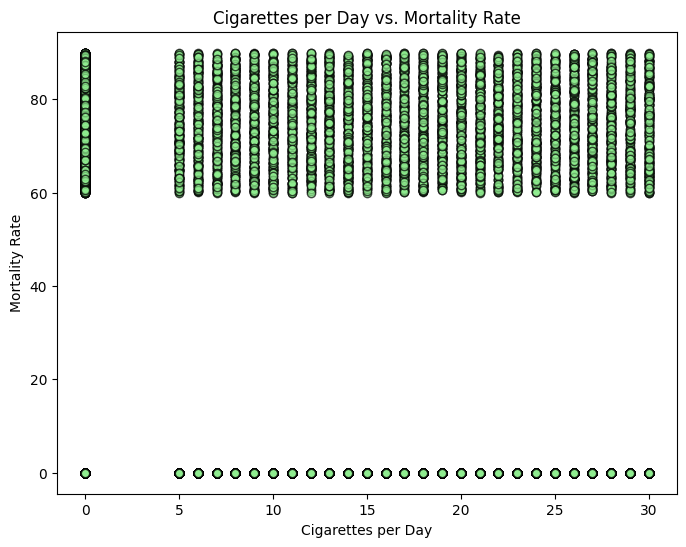

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Cigarettes_per_Day'], df['Mortality_Rate'], c='lightgreen', edgecolor='k', alpha=0.7)

plt.title('Cigarettes per Day vs. Mortality Rate')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Mortality Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

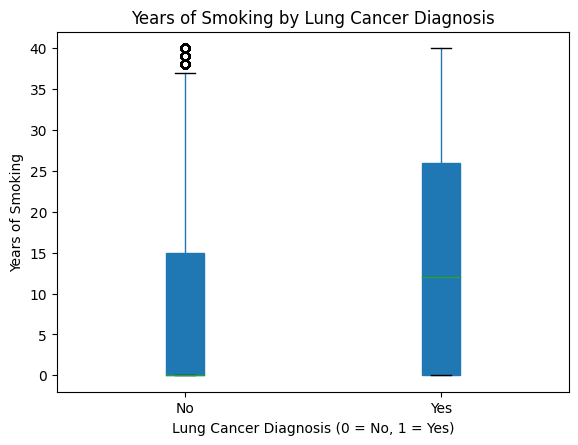

In [35]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Years_of_Smoking', by='Lung_Cancer_Diagnosis', grid=False, patch_artist=True)

plt.suptitle('') 
plt.title('Years of Smoking by Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Years of Smoking')
plt.show()

In [36]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)

Column: Gender
['Male' 'Female']
----------------------------------------
Column: Smoker
['Yes' 'No']
----------------------------------------
Column: Passive_Smoker
['No' 'Yes']
----------------------------------------
Column: Family_History
['No' 'Yes']
----------------------------------------
Column: Lung_Cancer_Diagnosis
['No' 'Yes']
----------------------------------------
Column: Cancer_Stage
['Stage 4' 'Stage 1' 'Stage 2' 'Stage 3']
----------------------------------------
Column: Adenocarcinoma_Type
['Yes' 'No']
----------------------------------------
Column: Air_Pollution_Exposure
['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
----------------------------------------
Column: Occupational_Exposure
['Yes' 'No']
----------------------------------------
Column: Indoor_Pollution
['No' 'Yes']
----------------------------------------
Column: Healthcare_Access
['Poor' 'Good']
----------------------------------------
Column: Early_Detection
['No' 'Yes']


In [37]:
encoder = LabelEncoder()
binary_columns = [
    'Gender', 'Smoker', 'Passive_Smoker', 'Family_History', 'Lung_Cancer_Diagnosis',
    'Adenocarcinoma_Type', 'Occupational_Exposure', 'Indoor_Pollution',
    'Early_Detection', 'Developed_or_Developing', 'Healthcare_Access'
]
for col in binary_columns:
    df[col] = encoder.fit_transform(df[col])

In [38]:
ordinal_mapping = {
    'Cancer_Stage': {'Stage 1': 1, 'Stage 2': 2, 'Stage 3': 3, 'Stage 4': 4},
    'Air_Pollution_Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Healthcare_Access': {'Poor': 0, 'Good': 1}
}

for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)

In [39]:
nominal_columns = ['Treatment_Type']

df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)  

In [47]:
X = df[['Air_Pollution_Exposure', 'Passive_Smoker', 'Cigarettes_per_Day', 'Developed_or_Developing' ]]
y = df['Lung_Cancer_Diagnosis']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred = model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9584154825843588
Confusion Matrix:
[[42292     0]
 [ 1835     0]]
